In [10]:
import numpy as np
import pathlib as plib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from lenslessclass.models import MultiClassLogistic, SLMMultiClassLogistic
from lenslessclass.datasets import MNISTAugmented
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from waveprop.devices import slm_dict, sensor_dict
import torchvision.datasets as dset
import matplotlib


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
linewidth = 3
markersize = 200


MODEL_DIR = "../models/mnist"


models = {

    # """ ORIGINAL DATASET """

    # 768, CNN lite
    # "Lens": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_CNNLite10_FC800_29082022_16h53"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_29082022_17h07"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_29082022_17h22"),
    # "Fixed SLM (m)": plib.Path('../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_29082022_17h36'),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_29082022_17h51"),
    "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM_CNNLite_10_FCNN800_poisson40.0_DSresize_29082022_23h51"),

    # # 48, CNN lite
    # "Lens": plib.Path("../MNIST_lens_outdim48_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_CNNLite10_FC800_30082022_08h07"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_08h32"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_08h56"),
    # "Fixed SLM (m)": plib.Path('../MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_09h21'),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_09h45"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim48_50epoch_seed0_SLM_CNNLite_10_FCNN800_poisson40.0_DSresize_30082022_02h37"),
    
    # # 12, CNN lite
    # "Lens": plib.Path("../MNIST_lens_outdim12_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_CNNLite10_FC800_30082022_08h19"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_08h44"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_09h09"),
    # "Fixed SLM (m)": plib.Path('../MNIST_adafruit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_09h33'),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNNLite10_FC800_30082022_09h57"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim12_50epoch_seed0_SLM_CNNLite_10_FCNN800_poisson40.0_DSresize_30082022_05h21"),

    # # -- 768, 800 hidden
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_10052022_23h56"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_18052022_00h14"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_18082022_14h44"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_11052022_17h25"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_15052022_22h47"),
    # # "Learned SLM paper": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_11052022_08h41"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_18082022_10h24"),
    

    # "Lens CNN": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_CNN_23082022_21h13"),
    # "Lens CNN": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_CNN_23082022_21h34"),

    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_11052022_17h10"),
    # "Fixed SLM (m) CNN 6 16": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNN_23082022_22h30"),
    # "Fixed SLM (m) CNN 10 16": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNN10_23082022_22h59"),
    # "Fixed SLM (m) CNN 10 20": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNN10_20_23082022_23h13"),

    # "Fixed SLM (s) CNN 6 16": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNN6_16_24082022_12h17"),
    # "Fixed SLM (s) CNN 10 16": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNN10_16_24082022_09h08"),
    # "Fixed SLM (s) CNN 10 20": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_CNN10_20_24082022_14h50"),
    # "Learned SLM CNN 6 16": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM_CNN_6_poisson40.0_DSresize_24082022_09h28"),
    # "Learned SLM CNN 10 16": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM_CNN_10_poisson40.0_DSresize_23082022_23h38"),
    # "Learned SLM CNN 10 20": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM_CNN_10_poisson40.0_DSresize_24082022_15h02"),

    # "Learned SLM x2": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_DSresize_24082022_14h42"),
    # "Learned SLM x4": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM4_SingleHidden800_poisson40.0_DSresize_24082022_18h19"),
    # "Learned SLM x6": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM6_SingleHidden800_poisson40.0_DSresize_29082022_13h35"),
    # "Learned SLM x8": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLM8_SingleHidden800_poisson40.0_DSresize_29082022_20h27"),

    # # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_09062022_14h04"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_13h51"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_13h12"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_13h25"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_13h38"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_10062022_12h21"),

    # ## -- 192, 800 hidden
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim192_height0.12_speckle40.0_croppsf100_50epoch_seed0_SingleHidden800_11052022_00h36"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_18052022_06h19"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_11052022_17h40"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_11052022_17h53"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_15052022_23h02"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim192_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_11052022_19h27"),
    
    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim192_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_09062022_16h49"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_16h37"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_15h53"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_16h10"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_16h23"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim192_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_09062022_17h02"),


    ## -- 48, 800 hidden
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim48_height0.12_speckle40.0_croppsf100_50epoch_seed0_SingleHidden800_11052022_01h17"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_18052022_07h04"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_100epoch_seed0_SingleHidden800_11052022_15h13"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_11052022_18h19"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_15052022_23h16"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_11052022_19h24"),
    # "Learned SLM x2": plib.Path("../MNIST_no_psf_down8_height0.12_outdim48_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_DSresize_25082022_21h33"),
    # "Learned SLM x4": plib.Path("../MNIST_no_psf_down8_height0.12_outdim48_50epoch_seed0_SLM4_SingleHidden800_poisson40.0_DSresize_24082022_22h48"),
    # "Learned SLM x6": plib.Path("../MNIST_no_psf_down8_height0.12_outdim48_50epoch_seed0_SLM6_SingleHidden800_poisson40.0_DSresize_25082022_16h00"),
    # "Learned SLM x8": plib.Path("../MNIST_no_psf_down8_height0.12_outdim48_50epoch_seed0_SLM8_SingleHidden800_poisson40.0_DSresize_30082022_07h37"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim48_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_09062022_23h41"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_23h30"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_22h58"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_23h09"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_09062022_23h19"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_09062022_23h53"),
    
    # ## -- 12, 800 hidden
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim12_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_13052022_06h07"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_18052022_07h49"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_17052022_23h31"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_12052022_12h03"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_15052022_23h30"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim12_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_12052022_12h21"),
    # "Learned SLM x2": plib.Path("../MNIST_no_psf_down8_height0.12_outdim12_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_DSresize_25082022_13h19"),
    # "Learned SLM x4": plib.Path("../MNIST_no_psf_down8_height0.12_outdim12_50epoch_seed0_SLM4_SingleHidden800_poisson40.0_DSresize_25082022_02h53"),
    # "Learned SLM x6": plib.Path("../MNIST_no_psf_down8_height0.12_outdim12_50epoch_seed0_SLM6_SingleHidden800_poisson40.0_DSresize_25082022_07h46"),


    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim12_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_10062022_06h31"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_06h20"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_05h48"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_05h58"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_06h09"),
    # "Learned SLM 1": plib.Path("../MNIST_no_psf_down8_height0.12_outdim12_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_10062022_06h43"),

    # # # -- 768
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim768_height0.12_speckle40.0_croppsf100_200epoch_seed0_logistic_reg_29042022_18h21"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_02h51"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_02h13"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_02h26"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_02h39"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim768_72epoch_seed1_logistic_reg_poisson40.0_DSresize_09052022_17h39"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_MultiClassLogistic_07062022_23h15"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_07062022_19h17"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_07062022_18h31"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_07062022_18h46"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_07062022_19h02"),
    # "Learned SLM 1": plib.Path("../MNIST_no_psf_down8_height0.12_outdim768_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_07062022_23h30"),

    # -- 192
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim192_height0.12_speckle40.0_croppsf100_100epoch_seed0_MultiClassLogistic_04052022_05h55"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_03h48"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_03h06"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_03h20"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_03h34"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim192_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_10052022_09h11"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim192_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_MultiClassLogistic_08062022_10h07"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_06h10"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_05h29"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_05h43"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim192_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_05h56"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim192_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_08062022_10h19"),


    # ## -- 48
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim48_height0.12_speckle40.0_croppsf100_100epoch_seed0_MultiClassLogistic_04052022_02h45"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_04h42"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_04h03"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_04h16"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_04h29"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim48_100epoch_seed0_logistic_reg_speckle40.0_04052022_15h04"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim48_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_MultiClassLogistic_08062022_20h39"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_16h57"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_16h17"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_16h30"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_08062022_16h44"),
    # "Learned SLM 1": plib.Path("../MNIST_no_psf_down8_height0.12_outdim48_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_08062022_20h51"),

    # ## -- 12
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim12_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_MultiClassLogistic_12052022_20h28"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_05h32"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_04h52"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_05h06"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_18052022_05h19"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_outdim12_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_12052022_21h03"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim12_height0.12_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_MultiClassLogistic_09062022_07h01"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_09062022_03h22"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_09062022_02h43"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_09062022_02h56"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_MultiClassLogistic_09062022_03h09"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_outdim12_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_09062022_07h13"),


    # """ PERTURBED DATASET """

    # # # 768
    # # -- random shift
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomShift_50epoch_seed0_SingleHidden800_14052022_00h18"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_18052022_03h46"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_18052022_01h20"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_18052022_03h29"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_18052022_03h13"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.12_RandomShift_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_13052022_13h54"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomShift_50epoch_seed0_SingleHidden800_11062022_00h58"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_10062022_20h10"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_10062022_15h53"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_10062022_17h29"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_10062022_18h56"),
    # "Learned SLM 1": plib.Path("../MNIST_no_psf_down8_height0.12_RandomShift_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_11062022_23h42"),

    # # -- rescale
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_19052022_00h31"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_18052022_04h35"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_19052022_02h06"),
    # # "Diffuser 1": plib.Path("../MNIST_tape_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_15062022_09h29"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_19052022_01h33"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_19052022_00h54"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.02-0.2_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_18052022_23h33"),
    
    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_11062022_04h42"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_20h25"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_16h18"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_17h48"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_10062022_19h15"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.02-0.2_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_12062022_05h45"),

    # # -- rotate
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomRotate90.0_50epoch_seed0_SingleHidden800_17052022_12h59"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_18052022_06h06"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_16052022_20h25"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_16052022_20h46"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_16052022_21h08"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.12_RandomRotate90.0_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_17052022_08h39"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomRotate90.0_50epoch_seed0_SingleHidden800_11062022_13h41"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_10062022_20h43"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_10062022_16h45"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_10062022_18h12"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_10062022_19h35"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_RandomRotate90.0_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_12062022_11h34"),

    # # -- perspective
    # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomPerspective0.5_50epoch_seed0_SingleHidden800_17052022_14h09"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_18052022_07h24"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_16052022_21h50"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_16052022_22h12"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_16052022_22h34"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.12_RandomPerspective0.5_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_18052022_14h34")

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim768_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomPerspective0.5_50epoch_seed0_SingleHidden800_11062022_23h25"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_10062022_21h01"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_10062022_17h10"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_10062022_18h36"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_10062022_19h54"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_RandomPerspective0.5_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_12062022_17h31"),

    # # 48
    # # -- random shift
    # # "Lens": MODEL_DIR / plib.Path("MNIST_lens_outdim48_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomShift_50epoch_seed0_SingleHidden800_14052022_14h31"),
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_18052022_11h45"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_13052022_13h05"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_13052022_13h11"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_16052022_18h54"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.12_RandomShift_outdim48_5epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14052022_21h09"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim48_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomShift_50epoch_seed0_SingleHidden800_13062022_07h19"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_13062022_02h23"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_12062022_23h22"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_13062022_00h22"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift_50epoch_seed0_SingleHidden800_13062022_01h23"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_RandomShift_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14062022_06h57"),

    # # -- rescale
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_18052022_11h56"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_14052022_14h37"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_14052022_14h03"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed1_SingleHidden800_17052022_06h57"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.02-0.2_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14052022_14h58"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_croppsf100_50epoch_seed0_SingleHidden800_13062022_11h11"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_13062022_02h36"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_12062022_23h36"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_13062022_00h36"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0_50epoch_seed0_SingleHidden800_13062022_01h37"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.02-0.2_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14062022_12h46"),

    # # -- rotate
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_18052022_12h07"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_14052022_22h08"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_14052022_22h08"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_16052022_21h29"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.12_RandomRotate90.0_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14052022_22h29"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim48_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomRotate90.0_50epoch_seed0_SingleHidden800_13062022_20h48"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_13062022_02h52"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_12062022_23h52"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_13062022_00h52"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0_50epoch_seed0_SingleHidden800_13062022_01h53"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_RandomRotate90.0_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14062022_18h43"),

    # # -- perspective
    # "CA": MODEL_DIR / plib.Path("MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_18052022_12h18"),
    # "Diffuser": MODEL_DIR / plib.Path("MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_15052022_01h35"),
    # "Fixed SLM (m)": MODEL_DIR / plib.Path("MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_15052022_01h34"),
    # "Fixed SLM (s)": MODEL_DIR / plib.Path("MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_16052022_23h07"),
    # "Learned SLM": MODEL_DIR / plib.Path("MNIST_no_psf_down8_height0.12_RandomPerspective0.5_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_15052022_01h26"),

    # # --- norm
    # "Lens": plib.Path("../MNIST_lens_outdim48_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomPerspective0.5_50epoch_seed0_SingleHidden800_14062022_06h44"),
    # "CA": plib.Path("../MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_13062022_03h08"),
    # "Diffuser": plib.Path("../MNIST_tape_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_13062022_00h09"),
    # "Fixed SLM (m)": plib.Path("../MNIST_adafruit_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_13062022_01h09"),
    # "Fixed SLM (s)": plib.Path("../MNIST_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5_50epoch_seed0_SingleHidden800_13062022_02h10"),
    # "Learned SLM": plib.Path("../MNIST_no_psf_down8_height0.12_RandomPerspective0.5_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_15062022_00h35"),

}

markers_dict = {
    "Lens": "o",
    "CA": "s",
    "Diffuser": "X",
    "Fixed SLM (m)": "^",
    "Fixed SLM (s)": "v",
    "Learned SLM": "D",
}
color_dict = {
    "Lens": "darkorange",
    "CA": "red",
    "Diffuser": "deeppink",
    "Fixed SLM (m)": "purple",
    "Fixed SLM (s)": "blue",
    "Learned SLM": "g",
}

markers = ["o", "s", "D", "P", "X", "v",  "<", ">", "D", ".", "1", "2", "3", "4", "8"]
linestyles = ["solid", "dotted", "dashed", "dashdot", (0, (3, 1, 1, 1, 1, 1))]

Learned SLM : 0.36946379363536824


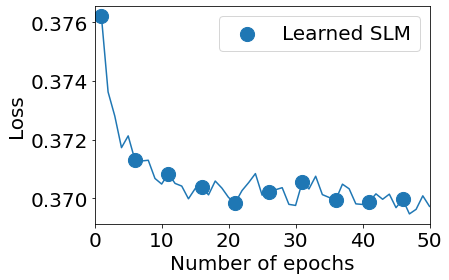

In [11]:
# load and plot error plots
for i, m in enumerate(models.keys()):
    test_loss = np.load(str(models[m] / "test_loss.npy"))
    n_epoch = np.arange(len(test_loss)) + 1
    print(f"{m} : {np.min(test_loss)}")
    plt.plot(n_epoch,  test_loss)
    plt.scatter(n_epoch[::5], test_loss[::5], marker=markers[i], label=m, s=markersize)
plt.legend()
plt.ylabel("Loss")
plt.xlim([0, 50])
plt.xlabel("Number of epochs");

Learned SLM : 0.9839999675750732


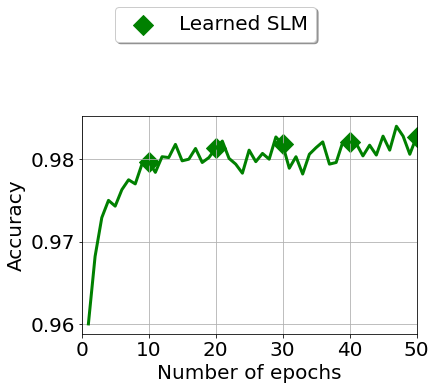

In [12]:
MAX_EPOCH = 50
every = 10


ax = plt.subplot(111)
for i, m in enumerate(models.keys()):
    test_acc = np.load(str(models[m] / "test_acc.npy"))
    n_epoch = np.arange(len(test_acc)) + 1
    print(f"{m} : {np.max(test_acc[:MAX_EPOCH])}")
    if m in color_dict.keys():
        ax.plot(n_epoch,  test_acc, linewidth=linewidth, linestyle="-", c=color_dict[m])
        ax.scatter(n_epoch[9::every], test_acc[9::every], marker=markers_dict[m], label=m, s=markersize, c=color_dict[m])
    else:
        ax.plot(n_epoch,  test_acc, linewidth=linewidth, linestyle="-")
        ax.scatter(n_epoch[9::every], test_acc[9::every], label=m, s=markersize)

plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, MAX_EPOCH]);
# plt.ylim([0.97, 0.99])
plt.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1.55),
          ncol=2, fancybox=True, shadow=True)

Learned SLM : 0.9976500272750854


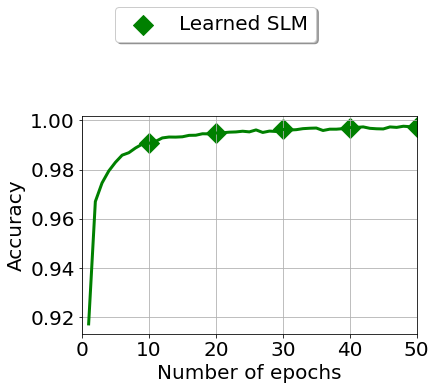

In [13]:
MAX_EPOCH = 50
every = 10


ax = plt.subplot(111)
for i, m in enumerate(models.keys()):
    test_acc = np.load(str(models[m] / "train_acc.npy"))
    n_epoch = np.arange(len(test_acc)) + 1
    print(f"{m} : {np.max(test_acc[:MAX_EPOCH])}")
    if m in color_dict.keys():
        ax.plot(n_epoch,  test_acc, linewidth=linewidth, linestyle="-", c=color_dict[m])
        ax.scatter(n_epoch[9::every], test_acc[9::every], marker=markers_dict[m], label=m, s=markersize, c=color_dict[m])
    else:
        ax.plot(n_epoch,  test_acc, linewidth=linewidth, linestyle="-")
        ax.scatter(n_epoch[9::every], test_acc[9::every], label=m, s=markersize)

plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, MAX_EPOCH]);
# plt.ylim([0.97, 0.99])
plt.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1.55),
          ncol=2, fancybox=True, shadow=True)

# Confusion matrix

In [26]:
import numpy as np
import pathlib as plib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from lenslessclass.models import MultiClassLogistic, SLMMultiClassLogistic, SingleHidden
from lenslessclass.datasets import MNISTAugmented
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from waveprop.devices import slm_dict, sensor_dict
import torchvision.datasets as dset
import matplotlib


## -- select model
# model_dir = models["Lens"]
# model_dir = models["CA"]
# model_dir = models["Diffuser"]
# model_dir = models["Fixed SLM (m)"]
# model_dir = models["Fixed SLM (s)"]
model_dir = models["Learned SLM"]

In [27]:
# Opening JSON file
f = open(str(model_dir / "metadata.json"))
metadata = json.load(f)
pprint(metadata)

{'batch_size': 200,
 'best_test_acc': 0.736299991607666,
 'best_test_acc_epoch': 49,
 'dataset': '/home/bezzam/LenslessClassification/data_norm/MNIST_no_psf_down8_height0.12_RandomPerspective0.5',
 'down_orig': 16.0,
 'mean': 0.00346263125538826,
 'min_val': -0.06734411418437958,
 'model': 'SLMSingleHidden800',
 'model_param': {'crop_fact': 0.8,
                 'deadspace': True,
                 'device': 'cuda:0',
                 'device_mask_creation': 'cpu',
                 'down': 'resize',
                 'dropout': None,
                 'hidden': 800,
                 'hidden2': None,
                 'input_shape': [380, 507],
                 'mask2sensor': 0.004,
                 'multi_gpu': True,
                 'scene2mask': 0.4,
                 'target_dim': [7, 7]},
 'noise_type': 'poisson',
 'random_shift': False,
 'seed': 0,
 'sensor': 'rpi_hq',
 'sensor_activation': 'relu',
 'slm': 'adafruit',
 'snr': 40.0,
 'std': 0.05141698569059372}


In [28]:
# load test set
if metadata["dataset"]:

    # if metadata["model"] == "SLMMultiClassLogistic":
    #     # hybrid
    #     trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
    #     test_set = MNISTAugmented(path=metadata["dataset"], train=False, transform=trans)
    # else:
    #     trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(metadata["mean"], metadata["std"])])
    #     test_set = MNISTAugmented(path=metadata["dataset"], train=False, transform=trans)

    trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(metadata["mean"], metadata["std"])])
    test_set = MNISTAugmented(path=metadata["dataset"], train=False, transform=trans)

else:
    root = "../data"
    trans = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((metadata["mean"],), (metadata["std"],))]
    )
    test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_set, batch_size=metadata["batch_size"], shuffle=False
)

In [29]:
# create model instance
use_cuda = torch.cuda.is_available()
if use_cuda:
    print("CUDA available, using GPU.")
    device = "cuda"
else:
    device = "cpu"
    print("CUDA not available, using CPU.")

if metadata["model"] == "SLMMultiClassLogistic" or "SLMSingleHidden" in metadata["model"]:
    sensor_act_fn = None
    sensor_act = metadata["sensor_activation"]
    if sensor_act is not None:
        if sensor_act == "relu":
            sensor_act_fn = nn.ReLU()
        elif sensor_act == "leaky":
            sensor_act_fn = nn.LeakyReLU(float=0.1)
        elif sensor_act == "tanh":
            sensor_act_fn = nn.Tanh()
        else:
            raise ValueError("Not supported activation.")

    metadata["model_param"].update(
        {
            "slm_config": slm_dict[metadata["slm"]],
            "sensor_config": sensor_dict[metadata["sensor"]],
            "sensor_activation": sensor_act_fn,
            "n_class": 10,
            "multi_gpu": [0, 1]    # FIX
        }
    )
    model = SLMMultiClassLogistic(**metadata["model_param"])
elif metadata["model"] == "MultiClassLogistic":
    model = MultiClassLogistic(**metadata["model_param"])
elif "SingleHidden" in metadata["model"]:
    model = SingleHidden(
        input_shape=metadata["model_param"]["input_shape"], 
        hidden_dim=int(metadata["hidden_dim"]), 
        n_class=10
    )
    if metadata["model_param"]["multi_gpu"]:
        model = nn.DataParallel(model, device_ids=metadata["model_param"]["multi_gpu"])
else:
    raise ValueError("Unsupported model.")

if use_cuda:
    model = model.to(device)

# -- load from state dict
state_dict_fp = str(model_dir / "state_dict.pth")
model.load_state_dict(torch.load(state_dict_fp))

if metadata["model"] == "SLMMultiClassLogistic" or "SLMSingleHidden" in metadata["model"]:
    # recompute PSF for loaded SLM values
    print("Computing PSF")
    model.compute_intensity_psf()

CUDA available, using GPU.
Computing PSF


In [30]:
print("\nModel's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


Model's state_dict:
slm_vals 	 torch.Size([51, 22])
conv_bn.module.weight 	 torch.Size([1])
conv_bn.module.bias 	 torch.Size([1])
conv_bn.module.running_mean 	 torch.Size([1])
conv_bn.module.running_var 	 torch.Size([1])
conv_bn.module.num_batches_tracked 	 torch.Size([])
linear1.module.weight 	 torch.Size([800, 48])
bn.module.weight 	 torch.Size([800])
bn.module.bias 	 torch.Size([800])
bn.module.running_mean 	 torch.Size([800])
bn.module.running_var 	 torch.Size([800])
bn.module.num_batches_tracked 	 torch.Size([])
linear2.module.weight 	 torch.Size([10, 800])
linear2.module.bias 	 torch.Size([10])


In [31]:
criterion = nn.CrossEntropyLoss()

y_pred = []
y_true = []
correct_cnt, running_loss = 0, 0
total_cnt = 0

if metadata["model_param"]["multi_gpu"]:
    device = "cuda:" + str(int(metadata["model_param"]["multi_gpu"][0]))

for x, target in test_loader:

    # get inputs
    if use_cuda:
        x, target = x.to(device=device), target.to(device=device)

    if "min_val" in metadata.keys():
        x -= metadata["min_val"]

    # forward, and compute loss
    out = model(x)
    loss = criterion(out, target)
    pred_label = torch.max(out.data, 1)[1]
    total_cnt += x.data.size()[0]
    correct_cnt += (pred_label == target.data).sum()
    running_loss += loss.item() / metadata["batch_size"]

    # save prediction and true for confusion matrix
    y_pred.extend(pred_label.data.cpu().numpy()) # Save Prediction
    y_true.extend(target.data.cpu().numpy())

acc = (correct_cnt * 1.0 / total_cnt).item()
print("test loss: {:.6f}, acc: {:.3f}".format( running_loss, acc))
print('Class distribution: %s' % np.bincount(y_true))

test loss: 0.433170, acc: 0.736
Class distribution: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


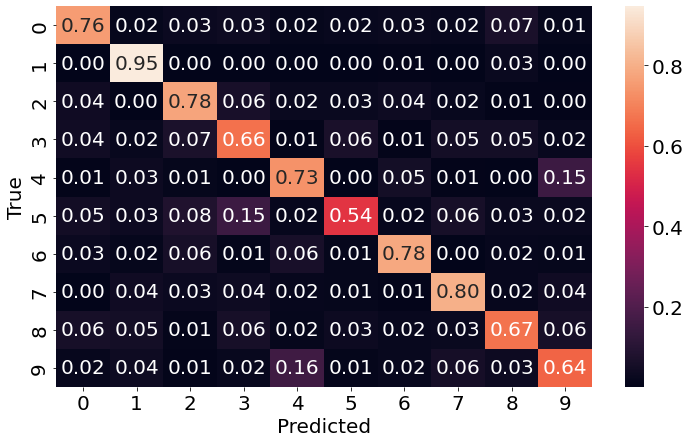

In [32]:
# Build confusion matrix
classes = np.arange(10)
cf_matrix = confusion_matrix(y_true, y_pred, normalize="true")
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True, fmt=".2f")
plt.ylabel("True")
plt.xlabel("Predicted");